# **Avaliação e Previsão de Agentes e Fenômenos que Mais Causam Impactos Socioeconômicos na Região Sudeste do Brasil**

# Sumário
0. [Instalação das Dependências](#instalar)
1. [Importação das Bibliotecas](#bibliotecas)
2. [Importação das Bases de Dados](#bases)
3. [Tratamento dos Dados](#tratamento)
4. [Aplicação de Modelos para Avaliação de Impacto das Variáveis](#impacto)
5. [Aplicação de Modelos para Previsão de Dados](#previsao)
6. [Importância das Variáveis com SHAP](#shap)
7. [Resultados](#resultado)
8. [Conclusão](#conclusao)

# **0.** Instalação das Dependências
<a id="instalar"></a>

In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1.** Importação das Bibliotecas
<a id="bibliotecas"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
import shap
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **2.** Importação das Bases de Dados
<a id="bases"></a>

In [3]:
rend_trabalho = pd.read_csv('../data/raw/Indic_Geo_Rend.csv', comment=None , header=1)
ind_trabalho = pd.read_csv('../data/raw/Indic_Geo.csv', comment=None , header=1)
gini = pd.read_csv('../data/raw/Indice_Gini_Geo.csv', comment=None , header=1)
nivel_instrucao = pd.read_csv('../data/raw/Instr_Geo.csv', comment=None , header=1)
populacao = pd.read_csv('../data/raw/Pop_Geo.csv', comment=None , header=1)
saneamento = pd.read_csv('../data/raw/Sane_Geo_pes.csv', comment=None , header=1)
analfabetos = pd.read_csv('../data/raw/TaxaAnalf_Geo.csv', comment=None , header=1)
mortalidade = pd.read_csv('../data/raw/TaxaMort_Geo.csv', comment=None , header=1)
plano = pd.read_csv('../data/raw/Benef_Plano_Geo.csv', comment=None , header=1)
leitos = pd.read_csv('../data/raw/Leit_IntTot_Geo.csv', comment=None , header=1)
ocupacao = pd.read_csv('../data/raw/CondOcup_Geo.csv', comment=None , header=1)

## Visualização das Bases de Dados

In [4]:
display(rend_trabalho)

,Estado,Ano,Rendimento médio real habitual do trabalho principal(R$/mês),Rendimento médio real habitual de todos os trabalhos(R$/mês),Rendimento-hora médio real habitual do trabalho principal(R$/hora),Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t
0,Rondônia,2023,2636,2695,18.0,18.0
1,Acre,2023,2338,2358,15.0,15.0
2,Amazonas,2023,2308,2367,14.4,14.4
3,Roraima,2023,2701,2791,16.7,16.6
4,Pará,2023,2176,2265,13.8,13.8
...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,3110,3211,18.9,18.9
131,Mato Grosso do Sul,2019,2910,3011,18.2,18.2
132,Mato Grosso,2019,2781,2846,17.4,17.2
133,Goiás,2019,2530,2597,15.2,15.2


In [5]:
display(ind_trabalho)

,Estado,Ano,População em idade de trabalhar,População na força de trabalho,População ocupada,População ocupada em trabalhos formais,População desocupada,População na força de trabalho potencial,População subutilizada,Taxa de participação,Nível de ocupação,Taxa de formalização,Taxa de desocupação,Taxa composta de subutilização
0,Rondônia,2023,1496,851,824,486,27,19.00,56.0,56.9,55.1,59.0,3.2,6.5
1,Acre,2023,691,342,316,152,25,36.00,68.0,49.4,45.7,48.0,7.5,18.0
2,Amazonas,2023,3182,1946,1752,703,194,139.00,424.0,61.2,55.1,40.1,9.9,20.3
3,Roraima,2023,449,280,262,120,18,13.38,62.5,58.4,45.7,6.6,12.8,NaN
4,Pará,2023,6862,4194,3869,1449,325,476.00,1123.0,61.1,56.4,37.4,7.7,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,9396,6280,5788,4045,492,219.00,1011.0,66.8,61.6,69.9,7.8,15.6
131,Mato Grosso do Sul,2019,2113,1460,1345,778,116,88.00,276.0,69.1,63.6,57.8,7.9,17.8
132,Mato Grosso,2019,2649,1845,1694,1006,151,85.00,309.0,69.6,63.9,59.4,8.2,16.0
133,Goiás,2019,5643,3817,3409,1933,408,179.00,731.0,67.6,60.4,56.7,10.7,18.3


In [6]:
display(gini)

,Estado,Ano,Índice Gini
0,Rondônia,2023,0.455
1,Acre,2023,0.511
2,Amazonas,2023,0.512
3,Roraima,2023,0.520
4,Pará,2023,0.501
...,...,...,...
131,Rio Grande do Sul,2019,0.482
132,Mato Grosso do Sul,2019,0.483
133,Mato Grosso,2019,0.454
134,Goiás,2019,0.460


In [7]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [8]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [9]:
display(populacao)

,Estado,Ano,População
0,Acre,2019,865
1,Alagoas,2019,3330
2,Amazonas,2019,3983
3,Amapá,2019,838
4,Bahia,2019,14854
...,...,...,...
130,Rio Grande do Sul,2023,11206
131,Santa Catarina,2023,7913
132,Sergipe,2023,2282
133,São Paulo,2023,45846


In [10]:
display(saneamento)

,Estado,Ano,Saneamento Basico Total(1 000 pessoas),Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)
0,Rondônia,2019,1841.0,22.7
1,Acre,2023,914.0,37.8
2,Amazonas,2023,4221.0,43.6
3,Roraima,2023,610.0,54.6
4,Pará,2023,8902.0,18.4
...,...,...,...,...
130,Rio Grande do Sul,2019,11359.0,68.4
131,Mato Grosso do Sul,2019,2709.0,49.9
132,Mato Grosso,2019,3431.0,36.9
133,Goiás,2019,7021.0,59.6


In [11]:
display(analfabetos)

,Estado,Ano,Taxa de Analfabetismo
0,Rondônia,2023,5.1
1,Acre,2023,9.4
2,Amazonas,2023,5.1
3,Roraima,2023,4.2
4,Pará,2023,6.9
...,...,...,...
130,Rio Grande do Sul,2019,2.4
131,Mato Grosso do Sul,2019,4.6
132,Mato Grosso,2019,5.6
133,Goiás,2019,4.6


In [12]:
display(mortalidade)

,Estado,Ano,Taxa Total Mortalidade,0 a 14 anos,15 a 29 anos,30 a 44 anos,45 a 59 anos,60 anos ou mais,60 a 69 anos,70 anos ou mais
0,Rondônia,2023,5.73,1.10,1.48,2.31,5.45,29.98,14.45,53.54
1,Acre,2023,4.78,1.54,1.32,2.10,5.11,30.23,13.93,52.75
2,Amazonas,2023,4.80,1.53,1.60,2.42,5.34,29.47,14.13,52.66
3,Roraima,2023,4.74,2.52,1.57,2.46,5.75,28.21,14.66,49.97
4,Pará,2023,5.08,1.33,1.44,2.26,4.94,28.61,13.43,49.27
...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,7.97,0.94,1.13,1.95,5.66,33.60,15.17,56.90
131,Mato Grosso do Sul,2019,6.06,1.08,1.22,2.07,5.81,32.07,14.83,55.31
132,Mato Grosso,2019,5.16,1.26,1.37,2.15,5.47,29.16,14.62,51.07
133,Goiás,2019,5.88,1.16,1.46,2.14,5.33,30.99,14.38,53.79


In [13]:
display(plano)

,Estado,T1 2019,T2 2019,T3 2019,T4 2019,T1 2020,T2 2020,T3 2020,T4 2020,T1 2021,...,T3 2021,T4 2021,T1 2022,T2 2022,T3 2022,T4 2022,T1 2023,T2 2023,T3 2023,T4 2023
0,Rondônia,99941,104567,104202,103809,105345,107436,106437,112245,109397,...,109470,109143,110414,111001,112095,112299,113119,115597,116071,120689
1,Acre,15112,14374,14409,15464,15573,15018,15544,15774,15552,...,16825,16934,17300,17219,17282,17279,17062,17349,18595,19973
2,Amazonas,400005,409042,415795,430642,439485,421017,439357,457801,459628,...,462127,490663,497536,505700,515848,509477,542588,549525,553702,558178
3,Roraima,9213,9476,9812,10665,10803,10289,10805,11289,10825,...,10972,10730,10902,11118,11045,11491,11372,11631,11768,11691
4,Pará,410263,417289,414379,426214,428410,418499,440902,457614,460211,...,505659,506517,499187,514505,508455,509878,510563,518613,525875,538871
5,Amapá,43889,43420,44229,44497,44445,44021,45834,48269,48598,...,49644,49510,48457,48235,50965,52097,51416,50313,47846,48172
6,Tocantins,49181,120511,121949,126251,126445,111537,62062,63728,63182,...,130005,130278,129395,119472,120848,121521,122139,121469,124778,127249
7,Maranhão,197051,194141,195059,201519,206131,199345,214092,223894,224574,...,240966,245027,252267,265950,272590,281604,287596,293209,314189,324883
8,Piauí,84202,84390,85628,91800,96288,89132,93756,105918,108355,...,120771,128841,130013,138822,145142,151008,157527,169434,179582,191980
9,Ceará,951107,964397,944408,966518,992173,958343,979538,996734,1022691,...,1020264,1048814,1051472,1088977,1126009,1157246,1174417,1194993,1222830,1321364


In [14]:
display(leitos)

,Estado,Ano,Número mensal médio de leitos de internação (total)
0,Rondônia,2019,4477
1,Acre,2019,1469
2,Amazonas,2019,5701
3,Roraima,2019,1071
4,Pará,2019,14412
...,...,...,...
130,Rio Grande do Sul,2023,29615
131,Mato Grosso do Sul,2023,5907
132,Mato Grosso,2023,7533
133,Goiás,2023,18728


In [15]:
display(ocupacao)

,Estado,Ano,Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas),Domicílio Próprio - já pago,Domicílio Próprio - pagando,Domicílio Alugado,Domicílio Cedido por empregador,Domicílio Cedido por familiar,Domicílio Cedido de outra forma,Outra Forma
0,Rondônia,2023,1841.0,68.8,1.5,19.9,2.0,6.2,1.5,0.1
1,Acre,2023,914.0,79.8,0.7,10.2,2.0,6.4,0.6,0.3
2,Amazonas,2023,4221.0,73.8,1.9,15.5,0.7,7.2,0.7,0.1
3,Roraima,2023,610.0,59.0,2.8,26.1,2.7,7.7,1.7,0.1
4,Pará,2023,8902.0,74.1,3.0,13.5,1.4,6.8,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...
131,Rio Grande do Sul,2019,11359.0,68.6,8.9,15.2,1.0,5.2,0.8,0.4
132,Mato Grosso do Sul,2019,2709.0,51.9,11.5,21.8,5.9,7.8,0.8,0.2
133,Mato Grosso,2019,3431.0,60.0,6.1,23.0,5.2,4.7,0.9,0.3
134,Goiás,2019,7021.0,54.5,11.1,23.1,3.1,7.2,0.7,0.4


# **3.** Tratamento dos Dados
<a id="tratamento"></a>

## Filtração dos Dados para Apenas a Região Sudeste do Brasil

In [16]:
rend_trabalho = rend_trabalho[(rend_trabalho['Estado'] == 'Minas Gerais') | (rend_trabalho['Estado'] == 'Espírito Santo') | (rend_trabalho['Estado'] == 'Rio de Janeiro') | (rend_trabalho['Estado'] == 'São Paulo')]
ind_trabalho = ind_trabalho[(ind_trabalho['Estado'] == 'Minas Gerais') | (ind_trabalho['Estado'] == 'Espírito Santo') | (ind_trabalho['Estado'] == 'Rio de Janeiro') | (ind_trabalho['Estado'] == 'São Paulo')]
gini = gini[(gini['Estado'] == 'Minas Gerais') | (gini['Estado'] == 'Espírito Santo') | (gini['Estado'] == 'Rio de Janeiro') | (gini['Estado'] == 'São Paulo')]
nivel_instrucao = nivel_instrucao[(nivel_instrucao['Estado'] == 'Minas Gerais') | (nivel_instrucao['Estado'] == 'Espírito Santo') | (nivel_instrucao['Estado'] == 'Rio de Janeiro') | (nivel_instrucao['Estado'] == 'São Paulo')]
populacao = populacao[(populacao['Estado'] == 'Minas Gerais') | (populacao['Estado'] == 'Espírito Santo') | (populacao['Estado'] == 'Rio de Janeiro') | (populacao['Estado'] == 'São Paulo')]
saneamento = saneamento[(saneamento['Estado'] == 'Minas Gerais') | (saneamento['Estado'] == 'Espírito Santo') | (saneamento['Estado'] == 'Rio de Janeiro') | (saneamento['Estado'] == 'São Paulo')]
analfabetos = analfabetos[(analfabetos['Estado'] == 'Minas Gerais') | (analfabetos['Estado'] == 'Espírito Santo') | (analfabetos['Estado'] == 'Rio de Janeiro') | (analfabetos['Estado'] == 'São Paulo')]
mortalidade = mortalidade[(mortalidade['Estado'] == 'Minas Gerais') | (mortalidade['Estado'] == 'Espírito Santo') | (mortalidade['Estado'] == 'Rio de Janeiro') | (mortalidade['Estado'] == 'São Paulo')]
leitos = leitos[(leitos['Estado'] == 'Minas Gerais') | (leitos['Estado'] == 'Espírito Santo') | (leitos['Estado'] == 'Rio de Janeiro') | (leitos['Estado'] == 'São Paulo')]
plano = plano[(plano['Estado'] == 'Minas Gerais') | (plano['Estado'] == 'Espírito Santo') | (plano['Estado'] == 'Rio de Janeiro') | (plano['Estado'] == 'São Paulo')]
ocupacao = ocupacao[(ocupacao['Estado'] == 'Minas Gerais') | (ocupacao['Estado'] == 'Espírito Santo') | (ocupacao['Estado'] == 'Rio de Janeiro') | (ocupacao['Estado'] == 'São Paulo')]

## Substituição dos Valores Nulos das Colunas que os possuem, por suas Respectivas Médias, de seus Respectivos Estados

### Variável *'Taxa composta de subutilização'* da Base `ind_trabalho`

In [17]:
media_mg = ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'].fillna(media_mg)

media_es = ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'].fillna(media_es)

media_rj = ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'].fillna(media_rj)

media_sp = ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'].fillna(media_sp)

In [18]:
ind_trabalho.isnull().sum()

Estado                                      0
Ano                                         0
População em idade de trabalhar             0
População na força de trabalho              0
População ocupada                           0
População ocupada em trabalhos formais      0
População desocupada                        0
População na força de trabalho potencial    0
População subutilizada                      0
Taxa de participação                        0
Nível de ocupação                           0
Taxa de formalização                        0
Taxa de desocupação                         0
Taxa composta de subutilização              0
dtype: int64

### Variável *'Saneamento Basico Total(1 000 pessoas)'* da Base `saneamento`

In [19]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_sp)

### Variável *'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'* da Base `saneamento`

In [20]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_sp)

In [21]:
saneamento.isnull().sum()

Estado                                                                                  0
Ano                                                                                     0
Saneamento Basico Total(1 000 pessoas)                                                  0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0
dtype: int64

### Variável *'Taxa de Analfabetismo'* da Base `analfabetos`



In [22]:
media_mg = analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'].fillna(media_mg)

media_es = analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'].fillna(media_es)

media_rj = analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'].fillna(media_rj)

media_sp = analfabetos.loc[analfabetos['Estado'] == 'São Paulo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'].fillna(media_sp)

In [23]:
analfabetos.isnull().sum()

Estado                   0
Ano                      0
Taxa de Analfabetismo    0
dtype: int64

### Variável *'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'* da Base `ocupacao`

In [24]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_sp)

### Variável *'Domicílio Próprio - já pago'* da Base `ocupacao`

In [25]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'].fillna(media_sp)

### Variável *'Domicílio Próprio - pagando'* da Base `ocupacao`

In [26]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'].fillna(media_sp)

### Variável *'Domicílio Alugado'* da Base `ocupacao`

In [27]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'].fillna(media_sp)

### Variável *'Domicílio Cedido por empregador'* da Base `ocupacao`

In [28]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'].fillna(media_sp)

### Variável *'Domicílio Cedido por familiar'* da Base `ocupacao`

In [29]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'].fillna(media_sp)

### Variável *'Domicílio Cedido de outra forma'* da Base `ocupacao`

In [30]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'].fillna(media_sp)

### Variável *'Outra Forma'* da Base `ocupacao`

In [31]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Outra Forma'].fillna(media_sp)

In [32]:
ocupacao.isnull().sum()

Estado                                                               0
Ano                                                                  0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    0
Domicílio Próprio - já pago                                          0
Domicílio Próprio - pagando                                          0
Domicílio Alugado                                                    0
Domicílio Cedido por empregador                                      0
Domicílio Cedido por familiar                                        0
Domicílio Cedido de outra forma                                      0
Outra Forma                                                          0
dtype: int64

## Padronização da Base `plano` para Dados Anuais, Utilizando a Média Anual de cada Estado

In [33]:
plano_reformado = plano.melt(id_vars=["Estado"], var_name="Trimestre", value_name="Número de beneficiários de plano de saúde")
plano_reformado["Ano"] = plano_reformado["Trimestre"].str.split().str[1].astype(int)
plano_anual = plano_reformado.groupby(["Estado", "Ano"], as_index=False)["Número de beneficiários de plano de saúde"].mean()
plano = plano_anual.copy()
display(plano)

,Estado,Ano,Número de beneficiários de plano de saúde
0,Espírito Santo,2019,508849.75
1,Espírito Santo,2020,527951.25
2,Espírito Santo,2021,591777.00
3,Espírito Santo,2022,639377.75
4,Espírito Santo,2023,686278.50
5,Minas Gerais,2019,2070470.25
6,Minas Gerais,2020,2125927.75
7,Minas Gerais,2021,2329022.50
8,Minas Gerais,2022,2548886.25
9,Minas Gerais,2023,2701387.25


## Unificação das Bases de Dados

In [34]:
bases =[rend_trabalho, ind_trabalho, gini, nivel_instrucao, populacao, saneamento, analfabetos, mortalidade, leitos, plano, ocupacao]
from functools import reduce

for df in bases:
    df.columns = df.columns.str.lower().str.strip()

for df in bases:
    df.loc[:, 'ano'] = pd.to_numeric(df['ano'], errors='coerce').astype('Int64')

database = reduce(lambda left, right: pd.merge(
    left, right, on=['estado', 'ano'], how='outer'), bases)
display(database)

,estado,ano,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
0,Espírito Santo,2019,2758,2880,17.1,17.1,3212,2188,1963,1115,...,8001,508849.75,4015.000000,64.200000,4.800000,19.700000,3.200000,7.400000,0.600000,0.100000
1,Espírito Santo,2020,2751,2834,16.7,16.7,3264,2087,1818,1085,...,8054,527951.25,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
2,Espírito Santo,2021,2487,2555,15.3,15.3,3263,2116,1849,1095,...,8161,591777.00,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
3,Espírito Santo,2022,2675,2773,16.3,16.3,3362,2170,1985,1207,...,8286,639377.75,4148.000000,63.600000,4.900000,21.100000,2.400000,6.800000,0.900000,0.300000
4,Espírito Santo,2023,2889,3004,18.4,18.4,3377,2158,2036,1222,...,8411,686278.50,4190.000000,62.400000,4.700000,22.000000,2.900000,7.500000,0.500000,0.100000
5,Minas Gerais,2019,2386,2511,15.0,15.0,17266,11448,10270,6196,...,40915,2070470.25,21158.000000,64.600000,7.800000,17.600000,1.800000,7.400000,0.700000,0.100000
6,Minas Gerais,2020,2408,2528,14.8,14.9,17489,10829,9456,5945,...,42385,2125927.75,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
7,Minas Gerais,2021,2378,2463,14.3,14.4,17448,10970,9640,5968,...,42771,2329022.50,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
8,Minas Gerais,2022,2355,2433,14.5,14.5,17558,11235,10370,6354,...,42838,2548886.25,21515.000000,63.600000,6.400000,20.100000,2.200000,6.900000,0.600000,0.200000
9,Minas Gerais,2023,2680,2810,16.1,16.2,17705,11483,10818,6692,...,42564,2701387.25,21624.000000,60.800000,7.200000,21.600000,2.100000,7.600000,0.600000,0.100000


### Importação da Base Unificada

In [35]:
#database.to_csv("../data/processed/database.csv", index=False)
#database.to_excel("../data/processed/database.xlsx", index=False)

# **4.** Aplicação de Modelos para Avaliação de Impacto das Variáveis
<a id="impacto"></a>

In [36]:
variaveis = [
    'rendimento médio real habitual do trabalho principal(r$/mês)',
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

target = 'rendimento médio real habitual do trabalho principal(r$/mês)'

scaler = MinMaxScaler()
df_norm = database.copy()
df_norm[variaveis] = scaler.fit_transform(df_norm[variaveis])

X = df_norm[variaveis]
y = df_norm[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Regressão Linear

In [38]:
ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [39]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo de Regressão Linear :")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Desempenho do modelo de Regressão Linear :
R²: 0.971608714040325
MAE: 0.040768767718498744
RMSE: 0.04826574785093819


In [40]:
coeficientes = pd.Series(
    best_model.coef_,
    index=variaveis
).sort_values(key=np.abs, ascending=False)

print("\nImpacto das variáveis no rendimento médio (Regressão Linear):")
print(coeficientes)


Impacto das variáveis no rendimento médio (Regressão Linear):
rendimento médio real habitual do trabalho principal(r$/mês)                            0.240814
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.213854
índice gini                                                                             0.170717
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.110800
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.100113
taxa de formalização                                                                    0.094368
sem instrução ou fundamental incompleto                                                -0.071049
taxa composta de subutilização                                                         -0.067951
60 a 69 anos                                                                            0.063326
30 a 44 anos                                                    

### Importando os Resultados

In [41]:
"""df_impacto = coeficientes.reset_index()
df_impacto.columns = ['variavel', 'impacto']

df_impacto.to_csv(
    "../data/processed/coeficientes_rl.csv",
    index=False,
    encoding="utf-8-sig"
)

df_impacto.to_excel(
    "../data/processed/coeficientes_rl.xlsx",
    index=False
)"""

'df_impacto = coeficientes.reset_index()\ndf_impacto.columns = [\'variavel\', \'impacto\']\n\ndf_impacto.to_csv(\n    "../data/processed/coeficientes_rl.csv",\n    index=False,\n    encoding="utf-8-sig"\n)\n\ndf_impacto.to_excel(\n    "../data/processed/coeficientes_rl.xlsx",\n    index=False\n)'

## Random Forest

In [42]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [43]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo Random Forest:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Desempenho do modelo Random Forest:
R²: 0.9056338481629541
MAE: 0.08054484870317001
RMSE: 0.0879943181510123


In [44]:
importancias = pd.Series(
    best_model.feature_importances_,
    index=variaveis
).sort_values(ascending=False)

print("\nImpacto das variáveis no rendimento médio:")
print(importancias)


Impacto das variáveis no rendimento médio:
sem instrução ou fundamental incompleto                                                 0.115551
proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0.086052
ensino fundamental completo ou médio incompleto                                         0.078351
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.077064
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.072480
rendimento médio real habitual do trabalho principal(r$/mês)                            0.060269
número de beneficiários de plano de saúde                                               0.059276
taxa de analfabetismo                                                                   0.053084
ensino superior completo                                                                0.049800
domicílio cedido por empregador                                                    

### Importando os Resultados

In [45]:
"""df_impacto = importancias.reset_index()
df_impacto.columns = ['variavel', 'impacto']

df_impacto.to_csv(
    "../data/processed/coeficientes_rfr.csv",
    index=False,
    encoding="utf-8-sig"
)

df_impacto.to_excel(
    "../data/processed/coeficientes_rfr.xlsx",
    index=False
)"""

'df_impacto = importancias.reset_index()\ndf_impacto.columns = [\'variavel\', \'impacto\']\n\ndf_impacto.to_csv(\n    "../data/processed/coeficientes_rfr.csv",\n    index=False,\n    encoding="utf-8-sig"\n)\n\ndf_impacto.to_excel(\n    "../data/processed/coeficientes_rfr.xlsx",\n    index=False\n)'

## XGBoost

In [46]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [47]:
grid = GridSearchCV(
    xgb,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=1  
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [48]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo XGBoost:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Desempenho do modelo XGBoost:
R²: 0.984298548737476
MAE: 0.025081379484030997
RMSE: 0.03589354931816954


In [49]:
importancias = pd.Series(
    best_model.feature_importances_,
    index=variaveis
).sort_values(ascending=False)

print("\nImpacto das variáveis no rendimento médio:")
print(importancias)


Impacto das variáveis no rendimento médio:
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.524852
rendimento médio real habitual do trabalho principal(r$/mês)                            0.297009
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.111542
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.034839
taxa de formalização                                                                    0.011654
índice gini                                                                             0.010499
domicílio cedido por familiar                                                           0.003960
outra forma                                                                             0.002396
15 a 29 anos                                                                            0.001086
população em idade de trabalhar                                                    

### Importando os Resultados

In [50]:
"""df_impacto = importancias.reset_index()
df_impacto.columns = ['variavel', 'impacto']

df_impacto.to_csv(
    "../data/processed/coeficientes_xg.csv",
    index=False,
    encoding="utf-8-sig"
)

df_impacto.to_excel(
    "../data/processed/coeficientes_xg.xlsx",
    index=False
)"""

'df_impacto = importancias.reset_index()\ndf_impacto.columns = [\'variavel\', \'impacto\']\n\ndf_impacto.to_csv(\n    "../data/processed/coeficientes_xg.csv",\n    index=False,\n    encoding="utf-8-sig"\n)\n\ndf_impacto.to_excel(\n    "../data/processed/coeficientes_xg.xlsx",\n    index=False\n)'

# **5.** Aplicação de Modelos para Previsão de Dados
<a id="previsao"></a>

## Regressão Linear

In [51]:
estados = [
    'Espírito Santo',
    'Minas Gerais',
    'São Paulo',
    'Rio de Janeiro'
]

metricas_gerais_rl = []
previsoes_futuras_rl = []
comparacao_teste_rl = []

for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')

    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_rl.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    metricas_gerais_rl.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        lr_var = LinearRegression()
        lr_var.fit(X_t, y_t)

        variaveis_previstas[var] = lr_var.predict(
            anos_futuros[['ano_norm']]
        )

    X_futuro = scaler_X.transform(variaveis_previstas)

    rendimento_previsto = model.predict(X_futuro)
    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_rl.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })


## Random Forest

In [52]:
estados = [
    'Espírito Santo',
    'Minas Gerais',
    'São Paulo',
    'Rio de Janeiro'
]

metricas_gerais_rf = []
previsoes_futuras_rf = []
comparacao_teste_rf = []


In [53]:
for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')
    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()
    rf = RandomForestRegressor(random_state=42)

    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt']
    }

    tscv = TimeSeriesSplit(n_splits=3)

    grid = GridSearchCV(
        rf,
        param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_rf.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    metricas_gerais_rf.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        rf_var = RandomForestRegressor(
            n_estimators=200,
            random_state=42
        )

        rf_var.fit(X_t, y_t)
        variaveis_previstas[var] = rf_var.predict(
            anos_futuros[['ano_norm']]
        )
    X_futuro = scaler_X.transform(variaveis_previstas)
    rendimento_previsto = best_model.predict(X_futuro)

    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_rf.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })

## XGBoost

In [54]:
estados = [
    'Minas Gerais',
    'São Paulo',
    'Espírito Santo',
    'Rio de Janeiro'
]

metricas_gerais_xg = []
previsoes_futuras_xg = []
comparacao_teste_xg = []


In [55]:
for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')
    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()

    xgb = XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    )

    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [3, 6],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    tscv = TimeSeriesSplit(n_splits=3)

    grid = GridSearchCV(
        xgb,
        param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metricas_gerais_xg.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        modelo_var = XGBRegressor(
            n_estimators=200,
            max_depth=3,
            learning_rate=0.1,
            objective='reg:squarederror',
            random_state=42
        )

        modelo_var.fit(X_t, y_t)
        variaveis_previstas[var] = modelo_var.predict(anos_futuros[['ano_norm']])

    X_futuro = scaler_X.transform(variaveis_previstas)
    rendimento_previsto = best_model.predict(X_futuro)

    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_xg.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })
    
    y_pred = best_model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_xg.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metricas_gerais_xg.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })


# **6.** Importância das Variáveis com SHAP
<a id="shap"></a>

Conforme apresentado no Índice de 'Análises de Variáveis Específicas da Base', o indicador central da análise —  *Rendimento Médio Mensal* — foi definido como referências para o desenvolvimento do estudo. As demais variáveis do conjunto de dados foram submetidas a análises exploratórias e avaliações de correlação em relação a esses indicadores, com a finalidade de examinar o grau de associação existente entre eles.

A partir dos resultados obtidos, esse indicador principal foi caracterizado como variável dependente, enquanto os demais elementos da base foram tratados como variáveis explicativas. Diante desse enquadramento metodológico, será empregada a regressão linear como ferramenta analítica, visando aprofundar a compreensão das relações estabelecidas e quantificar a influência e importância das variáveis explicativas sobre o indicador dependente no contexto socioeconômico analisado.

In [56]:
dependente_var = 'rendimento médio real habitual do trabalho principal(r$/mês)'

variaveis_independentes = [
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

In [57]:
def rodar_regressao_linear_stats(df, target, variaveis):
    X = df[variaveis]
    y = df[target]

    X = sm.add_constant(X)

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    modelo = sm.OLS(y_treino, X_treino).fit()

    y_pred = modelo.predict(X_teste)

    r2 = r2_score(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

    print(f'\nMODELO – {target.upper()}')
    print('-' * 60)
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}\n')

    return modelo

In [58]:
df_modelo = database.copy()

modelo_stats = rodar_regressao_linear_stats(
    df=df_modelo,
    target=target,
    variaveis=variaveis
)

print(modelo_stats.summary())


MODELO – RENDIMENTO MÉDIO REAL HABITUAL DO TRABALHO PRINCIPAL(R$/MÊS)
------------------------------------------------------------
R²: 0.9999
RMSE: 3.1874

                                                 OLS Regression Results                                                 
Dep. Variable:     rendimento médio real habitual do trabalho principal(r$/mês)   R-squared:                       1.000
Model:                                                                      OLS   Adj. R-squared:                    nan
Method:                                                           Least Squares   F-statistic:                       nan
Date:                                                          Thu, 05 Feb 2026   Prob (F-statistic):                nan
Time:                                                                  15:07:03   Log-Likelihood:                 346.25
No. Observations:                                                            16   AIC:                            -66

C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [59]:
def rodar_regressao_linear_shap(df, target, variaveis):
    X = df[variaveis]
    y = df[target]

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pipeline = Pipeline([
        ('padronizador', StandardScaler()),
        ('modelo', LinearRegression())
    ])

    pipeline.fit(X_treino, y_treino)

    y_pred = pipeline.predict(X_teste)

    r2 = r2_score(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

    print(f'\nMODELO SHAP – {target.upper()}')
    print('-' * 60)
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')

    X_treino_pad = pipeline.named_steps['padronizador'].transform(X_treino)
    X_teste_pad = pipeline.named_steps['padronizador'].transform(X_teste)

    explainer = shap.Explainer(
        pipeline.named_steps['modelo'],
        X_treino_pad
    )

    valores_shap = explainer(X_teste_pad)

    shap.summary_plot(
        valores_shap,
        features=X_teste,
        feature_names=variaveis
    )

    return pipeline, valores_shap

# **7.** Resultados
<a id="resultado"></a>

## Visualização da Importância/Impacto das Variáveis para o Indicador Principal


MODELO SHAP – RENDIMENTO MÉDIO REAL HABITUAL DO TRABALHO PRINCIPAL(R$/MÊS)
------------------------------------------------------------
R²: 0.9386
RMSE: 98.5301


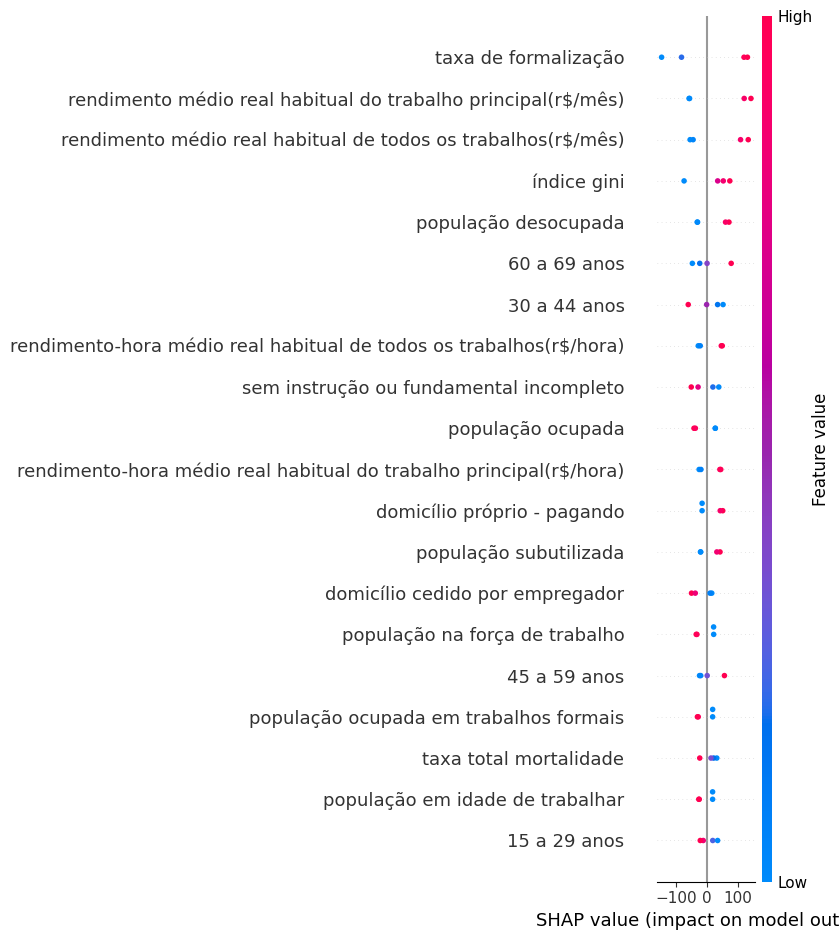

In [60]:
modelo_shap, valores_shap = rodar_regressao_linear_shap(
    df=df_modelo,
    target=target,
    variaveis=variaveis
)

In [61]:
importancia_shap = pd.DataFrame({
    'variavel': variaveis,
    'importancia_shap': np.abs(valores_shap.values).mean(axis=0)
}).sort_values(by='importancia_shap', ascending=False)

importancia_shap

,variavel,importancia_shap
13,taxa de formalização,120.256563
0,rendimento médio real habitual do trabalho pri...,94.448109
1,rendimento médio real habitual de todos os tra...,85.623429
16,índice gini,59.109653
8,população desocupada,48.447637
32,60 a 69 anos,37.414097
29,30 a 44 anos,37.122531
3,rendimento-hora médio real habitual de todos o...,36.523210
18,sem instrução ou fundamental incompleto,34.310307
6,população ocupada,33.409633


### Importando os Resultados

In [62]:
#importancia_shap.to_csv("../data/processed/importancia_variaveis.csv", index=False)
#importancia_shap.to_excel("../data/processed/importancia_variaveis.xlsx", index=False)

## Visualização Gráfica das Previsões dos Modelos 

### Regressão Linear

In [63]:
df_comparacao_rl = pd.DataFrame(comparacao_teste_rl)
print("\nValores reais x previstos (2022–2023):")
print(df_comparacao_rl.sort_values(['estado', 'ano']))


Valores reais x previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
0  Espírito Santo  2022      2675.0     2660.378649  -14.621351
1  Espírito Santo  2023      2889.0     2796.275538  -92.724462
2    Minas Gerais  2022      2355.0     2381.408394   26.408394
3    Minas Gerais  2023      2680.0     2430.758824 -249.241176
6  Rio de Janeiro  2022      3258.0     3328.768782   70.768782
7  Rio de Janeiro  2023      3551.0     3403.362739 -147.637261
4       São Paulo  2022      3329.0     3636.115766  307.115766
5       São Paulo  2023      3505.0     3562.154775   57.154775


### Importando os Resultados

In [64]:
"""df_resultado = df_comparacao_rl.sort_values(['estado', 'ano'])

df_resultado.to_csv(
    "../data/processed/comparacao_rl.csv",
    index=False
)

df_resultado.to_excel(
    "../data/processed/comparacao_rl.xlsx",
    index=False
)"""

'df_resultado = df_comparacao_rl.sort_values([\'estado\', \'ano\'])\n\ndf_resultado.to_csv(\n    "../data/processed/comparacao_rl.csv",\n    index=False\n)\n\ndf_resultado.to_excel(\n    "../data/processed/comparacao_rl.xlsx",\n    index=False\n)'

### Random Forrest

In [65]:
df_comparacao_rf = pd.DataFrame(comparacao_teste_rf)
print("\nValores reais x previstos (2022–2023):")
print(df_comparacao_rf.sort_values(['estado', 'ano']))


Valores reais x previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
0  Espírito Santo  2022      2675.0     2668.981667   -6.018333
1  Espírito Santo  2023      2889.0     2668.981667 -220.018333
2    Minas Gerais  2022      2355.0     2390.968889   35.968889
3    Minas Gerais  2023      2680.0     2390.968889 -289.031111
6  Rio de Janeiro  2022      3258.0     3416.538333  158.538333
7  Rio de Janeiro  2023      3551.0     3416.538333 -134.461667
4       São Paulo  2022      3329.0     3614.893333  285.893333
5       São Paulo  2023      3505.0     3614.893333  109.893333


### Importando os Resultados

In [66]:
"""df_resultado = df_comparacao_rf.sort_values(['estado', 'ano'])

df_resultado.to_csv(
    "../data/processed/comparacao_rfr.csv",
    index=False
)

df_resultado.to_excel(
    "../data/processed/comparacao_rfr.xlsx",
    index=False
)"""

'df_resultado = df_comparacao_rf.sort_values([\'estado\', \'ano\'])\n\ndf_resultado.to_csv(\n    "../data/processed/comparacao_rfr.csv",\n    index=False\n)\n\ndf_resultado.to_excel(\n    "../data/processed/comparacao_rfr.xlsx",\n    index=False\n)'

### XGBoost

In [67]:
df_comparacao_xg = pd.DataFrame(comparacao_teste_xg)
print("\nComparação entre valores reais e previstos (2022–2023):")
print(df_comparacao_xg.sort_values(['estado', 'ano']))


Comparação entre valores reais e previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
4  Espírito Santo  2022      2675.0     2492.203125 -182.796875
5  Espírito Santo  2023      2889.0     2757.467041 -131.532959
0    Minas Gerais  2022      2355.0     2378.236572   23.236572
1    Minas Gerais  2023      2680.0     2407.890381 -272.109619
6  Rio de Janeiro  2022      3258.0     3350.273193   92.273193
7  Rio de Janeiro  2023      3551.0     3513.384521  -37.615479
2       São Paulo  2022      3329.0     3503.238037  174.238037
3       São Paulo  2023      3505.0     3506.584473    1.584473


### Importando os Resultados

In [68]:
"""df_resultado = df_comparacao_xg.sort_values(['estado', 'ano'])

df_resultado.to_csv(
    "../data/processed/comparacao_xg.csv",
    index=False
)

df_resultado.to_excel(
    "../data/processed/comparacao_xg.xlsx",
    index=False
)"""

'df_resultado = df_comparacao_xg.sort_values([\'estado\', \'ano\'])\n\ndf_resultado.to_csv(\n    "../data/processed/comparacao_xg.csv",\n    index=False\n)\n\ndf_resultado.to_excel(\n    "../data/processed/comparacao_xg.xlsx",\n    index=False\n)'

### Visualização

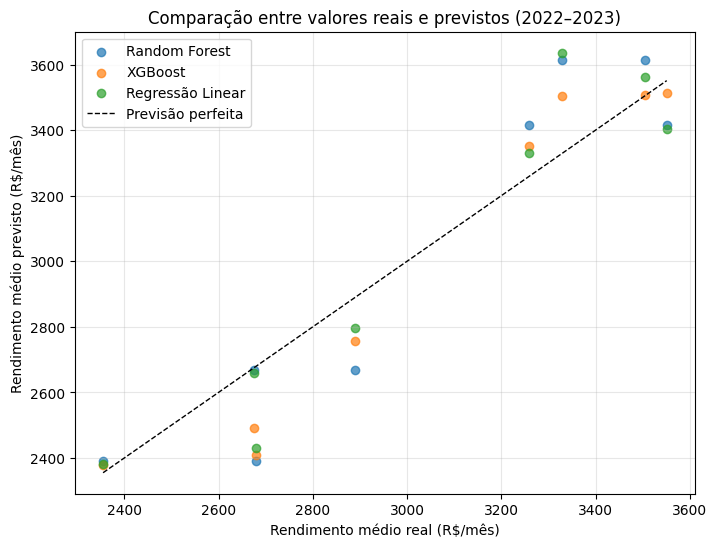

In [69]:
#XGBoost e Random Forest
df_plot = df_comparacao_xg.merge(
    df_comparacao_rf,
    on=['estado', 'ano'],
    suffixes=('_xgb', '_rf')
)

#Regressão Linear
df_plot = df_plot.merge(
    df_comparacao_rl[['estado', 'ano', 'valor_previsto']],
    on=['estado', 'ano'],
    how='left'
)

df_plot = df_plot.rename(columns={
    'valor_real_xgb': 'valor_real',
    'valor_previsto_xgb': 'valor_previsto_xgb',
    'valor_previsto_rf': 'valor_previsto_rf',
    'valor_previsto': 'valor_previsto_rl'
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

#Random Forest
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_rf'],
    alpha=0.7,
    label='Random Forest'
)

#XGBoost
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_xgb'],
    alpha=0.7,
    label='XGBoost'
)

#Regressão Linear
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_rl'],
    alpha=0.7,
    label='Regressão Linear'
)

min_val = df_plot['valor_real'].min()
max_val = df_plot['valor_real'].max()

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'k--',
    lw=1,
    label='Previsão perfeita'
)

plt.xlabel('Rendimento médio real (R$/mês)')
plt.ylabel('Rendimento médio previsto (R$/mês)')
plt.title('Comparação entre valores reais e previstos (2022–2023)')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


## Comparação dos Resultado dos Modelos de Previsão, Regressão Linear, Random Forest Regressor e XGBoost

In [70]:
#XGBoost e Random Forest
df_pred = df_comparacao_xg.merge(
    df_comparacao_rf,
    on=['estado', 'ano'],
    suffixes=('_xgb', '_rf')
)

#Regressão Linear
df_pred = df_pred.merge(
    df_comparacao_rl[['estado', 'ano', 'valor_previsto']],
    on=['estado', 'ano'],
    how='left'
)

df_pred = df_pred[[
    'estado',
    'ano',
    'valor_real_xgb',
    'valor_previsto_xgb',
    'valor_previsto_rf',
    'valor_previsto'      
]].rename(columns={
    'valor_real_xgb': 'indice_real',
    'valor_previsto_xgb': 'indice_previsto_xgb',
    'valor_previsto_rf': 'indice_previsto_rf',
    'valor_previsto': 'indice_previsto_rl'
})

display(
    df_pred.sort_values(
        by='indice_real',
        ascending=False
    )
)


,estado,ano,indice_real,indice_previsto_xgb,indice_previsto_rf,indice_previsto_rl
7,Rio de Janeiro,2023,3551.0,3513.384521,3416.538333,3403.362739
3,São Paulo,2023,3505.0,3506.584473,3614.893333,3562.154775
2,São Paulo,2022,3329.0,3503.238037,3614.893333,3636.115766
6,Rio de Janeiro,2022,3258.0,3350.273193,3416.538333,3328.768782
5,Espírito Santo,2023,2889.0,2757.467041,2668.981667,2796.275538
1,Minas Gerais,2023,2680.0,2407.890381,2390.968889,2430.758824
4,Espírito Santo,2022,2675.0,2492.203125,2668.981667,2660.378649
0,Minas Gerais,2022,2355.0,2378.236572,2390.968889,2381.408394


### Importando os Resultados

In [71]:
"""df_pred_ordenado = df_pred.sort_values(
    by='indice_real',
    ascending=False
)

df_pred_ordenado.to_csv(
    "../data/processed/comparacao_resultados.csv",
    index=False
)

df_pred_ordenado.to_excel(
    "../data/processed/comparacao_resultados.xlsx",
    index=False
)"""


'df_pred_ordenado = df_pred.sort_values(\n    by=\'indice_real\',\n    ascending=False\n)\n\ndf_pred_ordenado.to_csv(\n    "../data/processed/comparacao_resultados.csv",\n    index=False\n)\n\ndf_pred_ordenado.to_excel(\n    "../data/processed/comparacao_resultados.xlsx",\n    index=False\n)'

## Previsões Futuras do Indicador Principal

### Regressão Linear

In [72]:
df_previsoes = pd.DataFrame(previsoes_futuras_rl)
print("\nPrevisões do rendimento médio mensal (2024–2026):")
print(df_previsoes)


Previsões do rendimento médio mensal (2024–2026):
            estado   ano  rendimento_medio_previsto
0   Espírito Santo  2024                2686.309755
1   Espírito Santo  2025                2684.902727
2   Espírito Santo  2026                2683.495700
3     Minas Gerais  2024                2415.711256
4     Minas Gerais  2025                2422.003861
5     Minas Gerais  2026                2428.296465
6        São Paulo  2024                3556.481703
7        São Paulo  2025                3539.624235
8        São Paulo  2026                3522.766767
9   Rio de Janeiro  2024                3350.674582
10  Rio de Janeiro  2025                3335.424008
11  Rio de Janeiro  2026                3320.173434


### Importando os Resultados

In [73]:
#df_previsoes.to_csv("../data/processed/previsoes_rl.csv", index=False)
#df_previsoes.to_excel("../data/processed/previsoes_rl.xlsx", index=False)

### Random Forrest

In [74]:
df_previsoes = pd.DataFrame(previsoes_futuras_rf)
print("\nPrevisões do rendimento médio mensal (2024–2026):")
print(df_previsoes)


Previsões do rendimento médio mensal (2024–2026):
            estado   ano  rendimento_medio_previsto
0   Espírito Santo  2024                2668.981667
1   Espírito Santo  2025                2668.981667
2   Espírito Santo  2026                2668.981667
3     Minas Gerais  2024                2390.968889
4     Minas Gerais  2025                2390.968889
5     Minas Gerais  2026                2390.968889
6        São Paulo  2024                3614.893333
7        São Paulo  2025                3614.893333
8        São Paulo  2026                3614.893333
9   Rio de Janeiro  2024                3416.538333
10  Rio de Janeiro  2025                3416.538333
11  Rio de Janeiro  2026                3416.538333


### Importando os Resultados

In [75]:
#df_previsoes.to_csv("../data/processed/previsoes_rfr.csv", index=False)
#df_previsoes.to_excel("../data/processed/previsoes_rfr.xlsx", index=False)

### XGBoost

In [76]:
df_previsoes = pd.DataFrame(previsoes_futuras_xg)
print("\nPrevisões do rendimento médio mensal (XGBoost):")
print(df_previsoes)


Previsões do rendimento médio mensal (XGBoost):
            estado   ano  rendimento_medio_previsto
0     Minas Gerais  2024                2407.890381
1     Minas Gerais  2025                2407.890381
2     Minas Gerais  2026                2407.890381
3        São Paulo  2024                3503.238037
4        São Paulo  2025                3503.238037
5        São Paulo  2026                3503.238037
6   Espírito Santo  2024                2757.467041
7   Espírito Santo  2025                2757.467041
8   Espírito Santo  2026                2757.467041
9   Rio de Janeiro  2024                3513.384521
10  Rio de Janeiro  2025                3513.384521
11  Rio de Janeiro  2026                3513.384521


### Importando os Resultados

In [77]:
#df_previsoes.to_csv("../data/processed/previsoes_xg.csv", index=False)
#df_previsoes.to_excel("../data/processed/previsoes_xg.xlsx", index=False)

## Classificação da Distribuição dos Índices Previstos

In [78]:
df_previsoes_xg = pd.DataFrame(previsoes_futuras_xg)
df_previsoes_rf = pd.DataFrame(previsoes_futuras_rf)
df_previsoes_rl = pd.DataFrame(previsoes_futuras_rl)

In [79]:
df_estado_class = (
    df_previsoes
    .groupby('estado', as_index=False)
    .agg(
        rendimento_rf=('rendimento_medio_previsto', 'mean'),
        rendimento_xgb=('rendimento_medio_previsto', 'mean'),
        rendimento_rl=('rendimento_medio_previsto', 'mean')
    )
)


#Random Forest
df_estado_class['indice_socioeconomico_rf'] = scaler.fit_transform(
    df_estado_class[['rendimento_rf']]
)

df_estado_class['classificacao_rf'] = pd.cut(
    df_estado_class['indice_socioeconomico_rf'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

#XGBoost
df_estado_class['indice_socioeconomico_xg'] = scaler.fit_transform(
    df_estado_class[['rendimento_xgb']]
)

df_estado_class['classificacao_xgb'] = pd.cut(
    df_estado_class['indice_socioeconomico_xg'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

#Regressão Linear
df_estado_class['indice_socioeconomico_rl'] = scaler.fit_transform(
    df_estado_class[['rendimento_rl']]
)

df_estado_class['classificacao_rl'] = pd.cut(
    df_estado_class['indice_socioeconomico_rl'],
    bins=[0, 0.30, 0.60, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

In [80]:
ordem_colunas = [
    'estado',

    'rendimento_rl', 'indice_socioeconomico_rl', 'classificacao_rl',
    'rendimento_rf', 'indice_socioeconomico_rf', 'classificacao_rf',
    'rendimento_xgb', 'indice_socioeconomico_xg', 'classificacao_xgb'
]

df_estado_class = df_estado_class[ordem_colunas]


In [81]:
display(
    df_estado_class.sort_values(
        'rendimento_xgb',
        ascending=False
    )
)

,estado,rendimento_rl,indice_socioeconomico_rl,classificacao_rl,rendimento_rf,indice_socioeconomico_rf,classificacao_rf,rendimento_xgb,indice_socioeconomico_xg,classificacao_xgb
2,Rio de Janeiro,3513.384521,1.000000,alto,3513.384521,1.000000,alto,3513.384521,1.000000,alto
3,São Paulo,3503.238037,0.990822,alto,3503.238037,0.990822,alto,3503.238037,0.990822,alto
0,Espírito Santo,2757.467041,0.316217,médio,2757.467041,0.316217,baixo,2757.467041,0.316217,baixo
1,Minas Gerais,2407.890381,0.000000,baixo,2407.890381,0.000000,baixo,2407.890381,0.000000,baixo


### Importando os Resultados

In [82]:
"""df_estado = df_estado_class.sort_values(
    'rendimento_xgb',
    ascending=False
)

df_estado.to_csv(
    "../data/processed/classificacao_secundaria.csv",
    index=False
)

df_estado.to_excel(
    "../data/processed/classificacao_secundaria.xlsx",
    index=False
)"""

'df_estado = df_estado_class.sort_values(\n    \'rendimento_xgb\',\n    ascending=False\n)\n\ndf_estado.to_csv(\n    "../data/processed/classificacao_secundaria.csv",\n    index=False\n)\n\ndf_estado.to_excel(\n    "../data/processed/classificacao_secundaria.xlsx",\n    index=False\n)'

## Erro Médio Absoluto (MAE), Coeficiente de Determinação (R²) e (MSE) de Cada Modelo por Estado

### Regressão Linear

In [83]:
df_metricas = pd.DataFrame(metricas_gerais_rl)
print("\nMétricas da Regressão Linear por estado:")
print(df_metricas)


Métricas da Regressão Linear por estado:
           estado        R2       MAE      RMSE
0  Espírito Santo  0.615180  0.198055  0.244931
1    Minas Gerais -0.189464  4.594160  5.907555
2       São Paulo -5.300798  0.752625  0.912778
3  Rio de Janeiro  0.375532  0.661836  0.701631


### Random Forest

In [84]:
df_metricas = pd.DataFrame(metricas_gerais_rf)
print("\nMétricas do Random Forest por estado:")
print(df_metricas)


Métricas do Random Forest por estado:
           estado        R2       MAE      RMSE
0  Espírito Santo -1.115656  0.417042  0.574298
1    Minas Gerais -0.606300  5.416667  6.865078
2       São Paulo -5.057047  0.817741  0.894948
3  Rio de Janeiro -0.006752  0.887879  0.890871


### XGBoost

In [85]:
df_metricas = pd.DataFrame(metricas_gerais_xg)
print("\nMétricas do XGBoost por estado:")
print(df_metricas)


Métricas do XGBoost por estado:
           estado        R2       MAE      RMSE
0    Minas Gerais -0.412233  4.922437  6.437027
1    Minas Gerais -0.412233  4.922437  6.437027
2       São Paulo -0.960318  0.363270  0.509132
3       São Paulo -0.960318  0.363270  0.509132
4  Espírito Santo -1.214853  0.579945  0.587607
5  Espírito Santo -1.214853  0.579945  0.587607
6  Rio de Janeiro  0.768681  0.393602  0.427031
7  Rio de Janeiro  0.768681  0.393602  0.427031


# **8.** Conclusão
<a id="conclusao"></a>

## Modelagem e Seleção da Variável com Indicador Principal

O ponto focal da análise exploratória inicial (EDA) foi a variável Renda Média Real ($RMR$) , que demonstrou uma forte correlação estatística e influência significativa em um conjunto de variáveis socioeconômicas, abrangendo domínios como trabalho, educação, saúde e habitação. Dada essa estrutura de covariância, a $RMR$ foi estabelecida como a variável primária para a construção de um Índice Socioeconômico Regional ($ISR$). A metodologia de ponderação de variáveis foi então aplicada, utilizando a magnitude do peso de cada uma na $RMR$ para compor o $ISR$ primário. <br> <br>
**Classificação do $ISR$ (Estudo de Caso - Região Sudeste):** <br>
A classificação primária resultante para os estados do Sudeste demonstrou uma validação conceitual, sendo: <br>
* Baixo $ISR$: Minas Gerais e Espírito Santo.
* Médio $ISR$: Rio de Janeiro.
* Alto $ISR$: São Paulo. <br>
Essa hierarquia corrobora a disparidade de desenvolvimento infraestrutural e a concentração de capital observadas, validando o $ISR$ como um indicador robusto.

## Análise de Impacto/Importância das Variáveis

Procedeu-se a análise das variáveis que exercem maior impacto direto na determinação do indicador principal, considerando aquelas que apresentaram efeitos mais consistentes entre os diferentes modelos aplicados. Através dos resultados, foi possível avaliar a magnitude do efeito de cada variável sobre o indicador principal.

**Impacto Positivo (Efeito Direto no Indicador):**
As variáveis Taxa de Formalização, Índice de Gini, Rendimento Médio Real de Todos os Tipos de Trabalho e População Ocupada em Trabalhos Formais apresentaram impacto positivo sobre o indicador principal. Esses fatores estão diretamente associados à estrutura do mercado de trabalho e à distribuição de renda, refletindo condições que elevam o nível socioeconômico observado. Em especial, a ocupação formal funciona como mecanismo de estabilidade econômica, enquanto o rendimento médio sintetiza a capacidade de geração de bem-estar na saúde e educação da população.

**Impacto Negativo (Indicadores de Vulnerabilidade):**
Por outro lado, as variáveis População Desocupada e População Sem Instrução ou com Ensino Fundamental Incompleto exerceram impacto negativo sobre o indicador. Esses fatores representam fragilidades estruturais que limitam o acesso ao mercado de trabalho formal e reduzem o potencial de renda da população, diminuindo a garantia de acesso a mecanismos de sáude e educação qualificada.

Além do impacto, a utilização do modelo de regressão linear para o cálculo da importância das variáveis, aplicado ao rendimento médio real habitual do trabalho principal apresentou elevado poder explicativo (R² = 0,999), indicando que as variáveis socioeconômicas selecionadas explicam grande parte da variação do rendimento médio mensal, o que também permitiu a avaliação do peso conceitual e sistêmico da variável no fenômeno analisado.

**Importância Estrutural (Peso Sistêmico na Dinâmica Socioeconômica):**
No que se refere à importância das variáveis, destacam-se as variáveis a Taxa de Formalização, o Índice de Gini, as Taxas de Mortalidade nas faixas etárias de 30 a 44 anos e 60 a 69 anos, e a Cobertura por Plano de Saúde. Embora algumas dessas variáveis nem sempre apresentem impacto direto elevado no indicador em determinados contextos, elas possuem relevância estrutural por influenciarem múltiplas dimensões socioeconômicas.
Nesse sentido, a cobertura por plano de saúde exemplifica a distinção entre impacto e importância: mesmo que o impacto observado seja reduzido em um determinado período, por exemplo quando a utilização é baixa, a variável permanece estruturalmente importante, pois sua presença condiciona a capacidade de resposta do sistema de saúde e o bem-estar da população. Assim, uma variável pode ser conceitualmente essencial mesmo quando seu efeito direto mensurado é limitado.

De modo geral, os resultados evidenciam que o indicador principal é influenciado tanto por variáveis de impacto imediato, que refletem condições socioeconômicas observáveis, quanto por variáveis de importância estrutural, que sustentam e modulam a dinâmica do sistema ao longo do tempo. Essa distinção é fundamental para uma interpretação adequada dos resultados e para a formulação de políticas públicas mais eficazes.

## Avaliação de Desempenho dos Modelos Preditivos

Foram avaliados três modelos de Aprendizado de Máquina Supervisionado para a predição do indicador $RMR$: Regressão Linear Múltipla ($RL$), Random Forest Regressor ($RFR$) e XGBoost ($XG$). A comparação foi conduzida tanto sob a ótica da capacidade preditiva quanto da qualidade da estimação do impacto das variáveis explicativas sobre o indicador principal, o rendimento médio mensal.

Considerando as métricas globais utilizadas na análise de impacto das variáveis — coeficiente de determinação ($R^2$), erro médio absoluto ($MAE$) e raiz do erro quadrático médio ($RMSE$) — o modelo XGBoost apresentou desempenho superior de forma consistente nas três métricas. Em termos de capacidade explicativa, o $XG$ obteve um $R^2$ aproximadamente 1,29% superior ao da Regressão Linear e 8,68% superior ao do Random Forest, evidenciando maior aderência aos dados e melhor captura das relações não lineares entre as variáveis explicativas e o indicador analisado.

Ao analisar o Erro Médio Absoluto ($MAE$) nos testes dos modelos previamente à etapa de previsão, observou-se que, nos estados do Espírito Santo e Minas Gerais, o modelo de Regressão Linear apresentou os menores níveis de erro. Em contrapartida, para os estados de São Paulo e Rio de Janeiro, o modelo XGBoost demonstrou desempenho superior, registrando os menores valores de Erro Médio Absoluto na validação dos dados do indicador principal referentes aos anos de 2022 e 2023. Quando considerada a avaliação do erro de forma agregada, englobando o MAE de todos os estados para cada modelo, o XGBoost destacou-se por apresentar a menor média de erro médio absoluto entre os modelos avaliados, indicando maior robustez e melhor desempenho preditivo geral no conjunto de dados analisado.

A avaliação do desempenho preditivo foi realizada de forma desagregada por estado, utilizando o Erro Médio Absoluto ($MAE$), o coeficiente de determinação ($R^2$) e o RMSE. Na métrica MAE, a Regressão Linear apresentou melhor desempenho para os estados do Espírito Santo ($0,198$) e Minas Gerais ($4,594$), enquanto o XGBoost obteve resultados superiores para São Paulo ($0,363$) e Rio de Janeiro ($0,393$). Padrão semelhante foi observado na análise do $R^2$, a Regressão Linear apresentou resultados relativamente mais favoráveis em Espírito Santo ($0,615$) e Minas Gerais ($-0,189$), ao passo que o XGBoost se destacou nos estados de São Paulo ($-0,960$) e Rio de Janeiro ($0,768$). No que se refere ao RMSE, a Regressão Linear demonstrou maior eficácia em Minas Gerais ($5,907$) e Espírito Santo ($0,244$), enquanto o XGBoost apresentou menor erro para São Paulo ($0,509$) e Rio de Janeiro ($0,427$).


De maneira geral, o modelo Random Forest apresentou desempenho inferior em relação aos demais, tanto na estimação do impacto das variáveis quanto nas previsões, não se mostrando favorável para o conjunto de dados analisado. Embora a Regressão Linear tenha apresentado desempenho satisfatório em alguns estados, o XGBoost mostrou-se globalmente superior por combinar boa performance preditiva com maior robustez na quantificação do impacto das variáveis explicativas, aspecto central para a construção e interpretação do indicador proposto. Assim, o modelo XGBoost pode ser considerado o mais parcimonioso e acurado para este dataset.

Essa conclusão é corroborada pela análise visual do gráfico de comparação entre valores reais e previstos, no qual as previsões do $XG$ apresentam menor dispersão em torno da linha de identidade (valor real = valor previsto), indicando menor viés e variância quando comparadas aos demais modelos. Adicionalmente, a validação cruzada da classificação dos índices previstos (MG/ES: Baixo; RJ: Médio/Alto; SP: Alto) manteve a categorização originalmente definida, reforçando a estabilidade do modelo XGBoost e a consistência do indicador $ISR$ proposto.

## Insigths

Os principais insights observados foram: <br>
* **O Mercado de Trabalho e Educação como Fator Causal Primário:** A inserção da população no mercado de trabalho foi identificado como uns dos principais fatores da $RMR$ e, consequentemente, do $ISR$. Junto disso, a inserção dentro do mercado está fielmente associado ao nível de instrução educacional da população (baixo analfabetismo, conclusão dos ensinos fundamental e superior), sendo um nível consideravel, significativo para ingressar nesse meio, influenciado também o $RMR$ consequentemente $ISR$. Isso sugere que políticas públicas focadas em aprimoramento educacional e inclusão terão o maior efeito multiplicador na melhoria do índice socioeconômico e da qualidade de vida, pois através disso a ingressão no mercado de trabalho será mais favorável visto que estas variáveis são proporcionais. <br><br>
* **Performance Preditiva:** O modelo XGBoost consolidou-se como o melhor preditor global do $ISR$, com desempenho particularmente superior nos estados de São Paulo e Rio de Janeiro. Sua vantagem em relação aos demais modelos decorre, sobretudo, da robustez apresentada nas métricas associadas ao cálculo do impacto das variáveis explicativas, aspecto central para a estimação do $RMR$ final. Essa combinação entre elevada capacidade explicativa e bom desempenho preditivo reforça a adequação do XGBoost como modelo principal para a construção do indicador proposto. <br> <br>
* **Validade Estrutural:** O $ISR$ proposto reproduz de forma consistente a hierarquia socioeconômica historicamente observada na Região Sudeste (SP > RJ > MG/ES), evidenciando sua capacidade de capturar diferenças estruturais entre os estados. Esse resultado indica que o índice constitui um instrumento robusto e fundamentado para a mensuração das desigualdades regionais, sendo adequado tanto para a alocação estratégica de recursos quanto para o monitoramento do desenvolvimento socioeconômico ao longo do tempo.

## Sugestões

Com base nas análises realizadas, pricipalmente relacionadas à importância das variáveis explicativas do $RMR$, que impactam diretamente a construção do $ISM$, é possível identificar diretrizes prioritárias de investimento público capazes de promover a elevação sustentada do nível socioeconômico regional. Os resultados indicam que políticas estruturadas nos eixos de educação, mercado de trabalho e saúde exercem influência significativa sobre o indicador proposto.

No âmbito da **educação**, o investimento em qualidade educacional apresenta-se como um dos principais vetores de melhoria do índice socioeconômico. Isso envolve a qualificação e valorização do corpo docente, a modernização dos conteúdos curriculares com incorporação de temas contemporâneos e alinhados às transformações econômicas e tecnológicas, bem como o fortalecimento de políticas de incentivo à permanência e progressão educacional. A ampliação do acesso ao ensino público gratuito, tanto na educação básica quanto no ensino superior, aliada à implementação de currículos contextualizados e profissionalizantes no ensino médio, contribui de forma direta para a formação de capital humano qualificado e para o aumento do rendimento médio ao longo do tempo.

No que se refere ao **mercado de trabalho**, a inserção da população em ocupações formais configura-se como elemento central. Nesse contexto, políticas públicas voltadas à ampliação do acesso a programas de estágio, aprendizagem e primeiro emprego, bem como mecanismos de incentivo à contratação de jovens com formação simultaneamente teórica e prática. Estratégias baseadas no mapeamento sistemático de competências regionais,  conduzidas por associações setoriais e órgãos públicos, permitem identificar setores em expansão e direcionar investimentos educacionais e bolsas de capacitação para áreas com maior demanda local. Adicionalmente, a adaptação periódica das matrizes curriculares das instituições de ensino às necessidades do mercado regional, aliada à promoção da alfabetização digital e da educação empreendedora, contribui para o fortalecimento da empregabilidade e da geração de renda.

No eixo da **saúde**, os resultados evidenciam elevada relevância de variáveis associadas à taxa de mortalidade da população entre 30 e 44 anos e ao acesso a serviços de saúde. Nesse sentido, a ampliação de uma infraestrutura de saúde acessível, gratuita e de qualidade constitui um fator determinante para a melhoria do índice socioeconômico. Investimentos em atenção primária, em serviços de apoio psicológico acessíveis, especialmente no ambiente de trabalho, e em políticas de segurança alimentar tendem a reduzir a mortalidade precoce e a elevar os níveis de bem-estar e produtividade. Ademais, a formação e inserção de profissionais de saúde de base, como técnicos de enfermagem e agentes comunitários, atendem a uma demanda estrutural elevada, promovendo simultaneamente a geração de emprego e a melhoria dos indicadores socioeconômicos regionais.